In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df =  pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Checking for null values and analysing the categorical columns

In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Performing EDA

In [4]:
print(df.sex.unique())
print(df.day.unique())
print(df.smoker.unique())
print(df.time.unique())

['Female' 'Male']
['Sun' 'Sat' 'Thur' 'Fri']
['No' 'Yes']
['Dinner' 'Lunch']


/var/folders/l5/3rnb13wx6mn2qh_9r15fzd_40000gn/T/ipykernel_23905/1652803423.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tips = df.groupby('total_bill_bin')['tip'].mean().reset_index()
/var/folders/l5/3rnb13wx6mn2qh_9r15fzd_40000gn/T/ipykernel_23905/1652803423.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_bill_bin', y='tip', data=average_tips, palette='viridis')


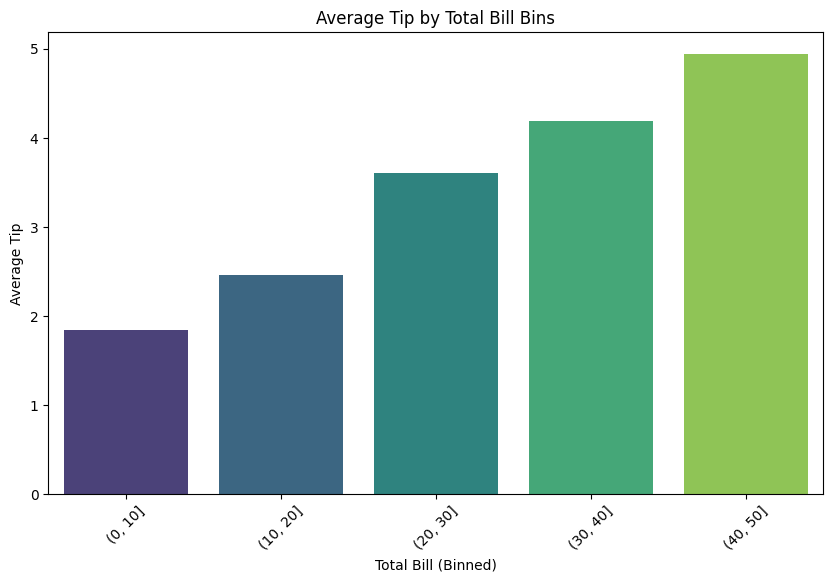

In [42]:
bins = range(0, int(df['total_bill'].max()) + 10, 10)  # Create bins of size 10
df['total_bill_bin'] = pd.cut(df['total_bill'], bins=bins)

# Calculate the average tip for each total_bill bin
average_tips = df.groupby('total_bill_bin')['tip'].mean().reset_index()

# Plot the average tip by total bill bins
plt.figure(figsize=(10, 6))
sns.barplot(x='total_bill_bin', y='tip', data=average_tips, palette='viridis')
plt.title('Average Tip by Total Bill Bins')
plt.xlabel('Total Bill (Binned)')
plt.ylabel('Average Tip')
plt.xticks(rotation=45)
plt.show()

There seems to be a linear relationship between the average tip and the total_bill

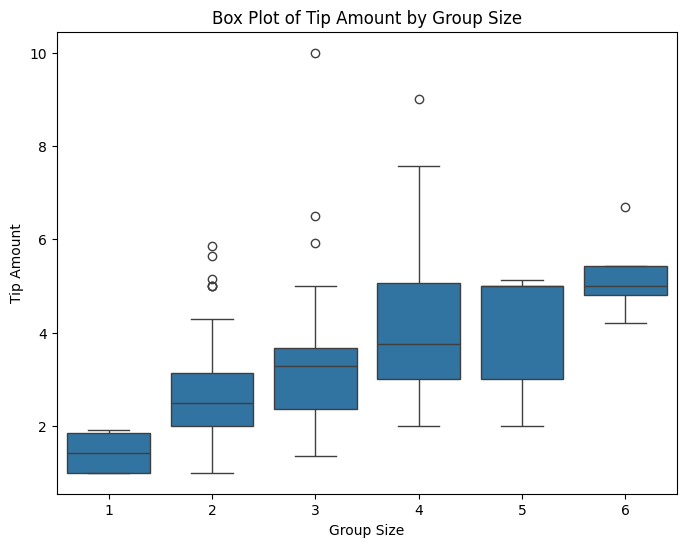

In [22]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Group Size')
plt.xlabel('Group Size')
plt.ylabel('Tip Amount')
plt.show()

Tip amount seems to be proportional to group size

Text(0.5, 1.0, 'Box Plot of Tip')

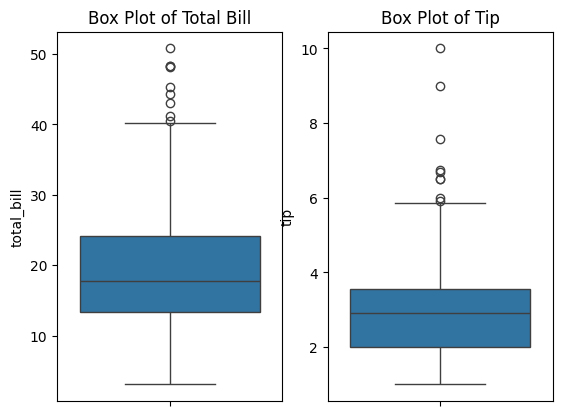

In [27]:
plt.subplot(1, 2, 1)
sns.boxplot(y='total_bill', data=df)
plt.title('Box Plot of Total Bill')

# Box plot for 'tip'
plt.subplot(1, 2, 2)
sns.boxplot(y='tip', data=df)
plt.title('Box Plot of Tip')

There are some outliers, they may be gunuine or maybe mistakes in collecting data.

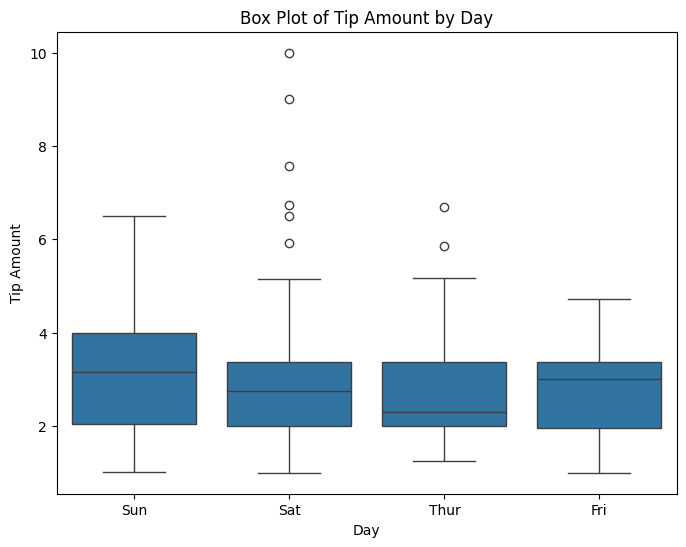

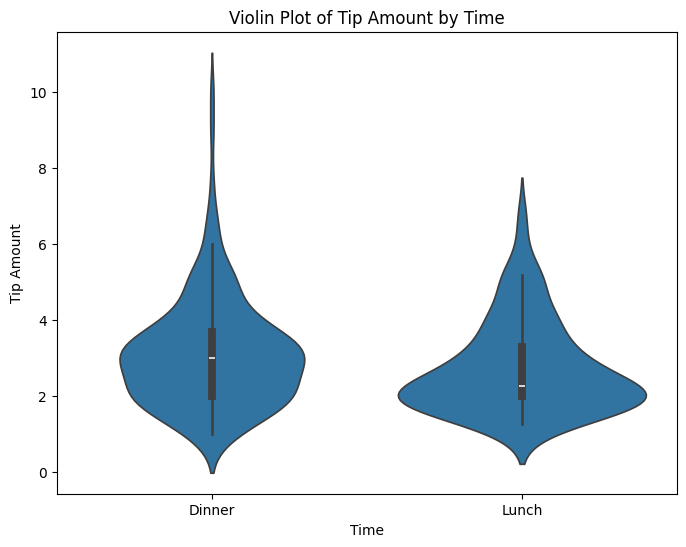

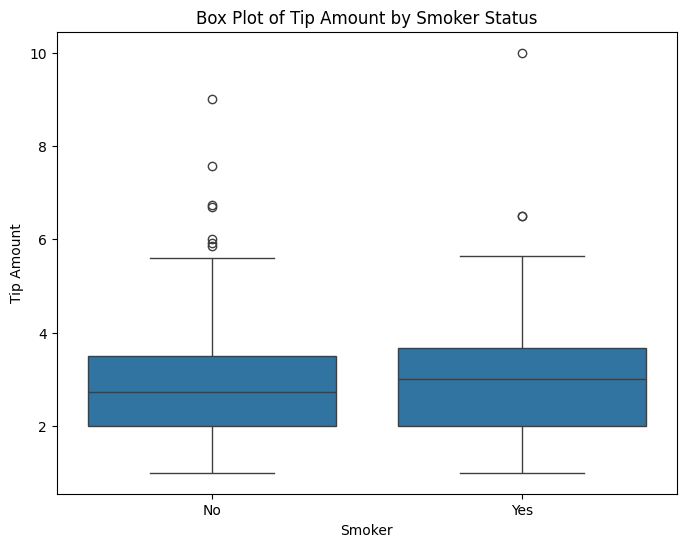

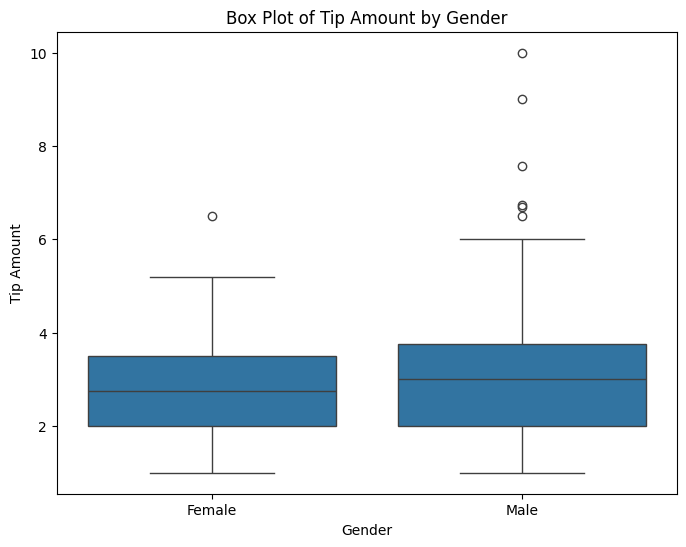

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()

# Violin Plot for 'time' (Lunch/Dinner) vs 'tip' to show distribution of tips for each time period
plt.figure(figsize=(8, 6))
sns.violinplot(x='time', y='tip', data=df)
plt.title('Violin Plot of Tip Amount by Time')
plt.xlabel('Time')
plt.ylabel('Tip Amount')
plt.show()

# Box Plot for 'smoker' status vs 'tip' to see tip distribution for smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.show()

# Box Plot for 'sex' vs 'tip' to see tip distribution for each gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Box Plot of Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip Amount')
plt.show()

INFERENCE:
1. Tips improve as the week progresses, i.e., the mean tip is smallest on Thrusday and goes to a maximum on Sunday. (Saturday seems to have some unusally high tips, could be outliers)
2. More tips are offered during the dinner than at lunch.
3. Smokers tend to tip more on average
4. Male customers are found to tip more 

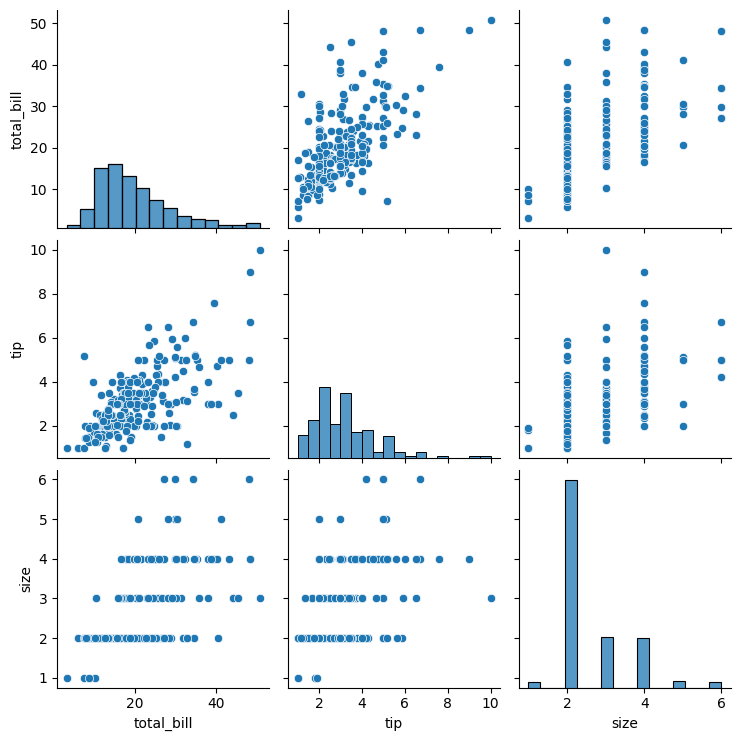

In [106]:
sns.pairplot(df)
plt.show()

Outliers can be seen, we will try to remove them from the dataset

In [ ]:
# def remove_outliers(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)  # 25th percentile
#         Q3 = df[col].quantile(0.75)  # 75th percentile
#         IQR = Q3 - Q1  # Interquartile range
#         # Define the outlier boundaries
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         # Filter out rows where the column value is within the bounds
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

# # Identify numerical columns to remove outliers
# numerical_cols = ['tip','total_bill']  # List of numerical columns
# df_cleaned = remove_outliers(df, numerical_cols)

# # Display the cleaned dataset summary
# print("Original dataset size:", df.shape)
# print("Cleaned dataset size:", df_cleaned.shape)

Original dataset size: (244, 8)
Cleaned dataset size: (227, 8)


It was found that removing outliers was making the predictions worse as the dataset is quite small, hence we are not doing that

In [121]:
# new_df = pd.get_dummies(df.drop(columns = ['total_bill_bin']), columns =['sex','day', 'smoker', 'time'], drop_first=True)
new_df = pd.get_dummies(df.drop(columns = ['total_bill_bin']), columns =['sex','day', 'smoker', 'time'], drop_first=False)
new_df.head()

,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,False,False,True,False,True,False,True,False
1,10.34,1.66,3,False,True,False,False,True,False,True,False,True,False
2,21.01,3.50,3,False,True,False,False,True,False,True,False,True,False
3,23.68,3.31,2,False,True,False,False,True,False,True,False,True,False
4,24.59,3.61,4,True,False,False,False,True,False,True,False,True,False


It was found that not dropping the first column in making dummies was giving better results than dropping them

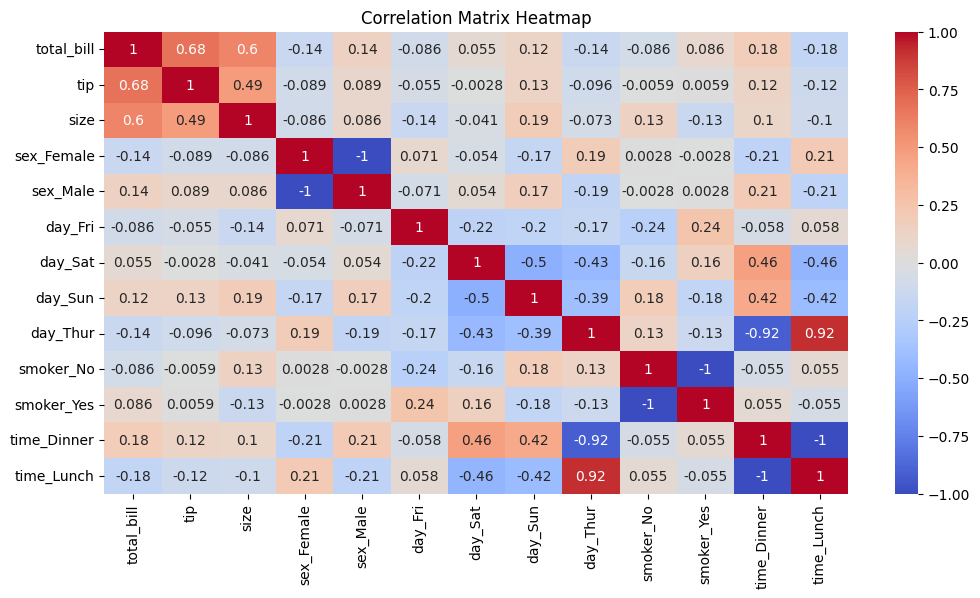

In [133]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Major correlation of tip seems to be with total_bill and size of group

Diving dataset into Train and test set

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = new_df.drop(columns=['tip'])
y= new_df.tip

# X_scaled=  scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2 , random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

It was found that using unscalled data was producing better results

In [127]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(195, 12) (49, 12) (195,) (49,)


In [128]:
X_train.head()

,total_bill,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
228,13.28,2,False,True,False,True,False,False,True,False,True,False
208,24.27,2,False,True,False,True,False,False,False,True,True,False
96,27.28,2,False,True,True,False,False,False,False,True,True,False
167,31.71,4,False,True,False,False,True,False,True,False,True,False
84,15.98,2,False,True,False,False,False,True,True,False,False,True


In [129]:
y_train.head()

228    2.72
208    2.03
96     4.00
167    4.50
84     2.03
Name: tip, dtype: float64

I will difine a dictionary of models so as to avoid making multiple cells

In [92]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [130]:
# import important libraries

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow


In [131]:
models =  {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 0.1),
    'Lasso Regression': Lasso(alpha = 0.1),
    'Support Vector Regressor': SVR(),
    'K Nearest Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

Training models

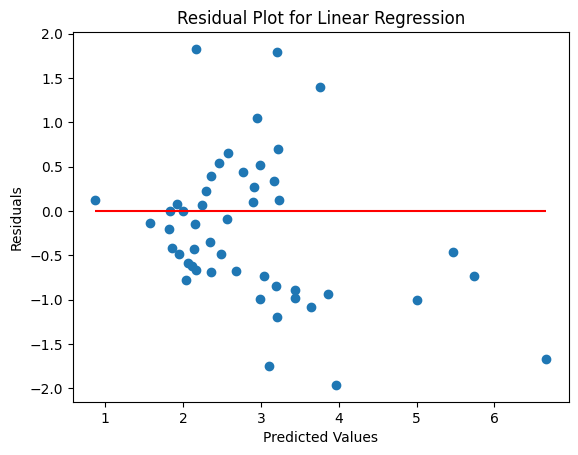

Linear Regression - MSE: 0.70, R2 Score: 0.44


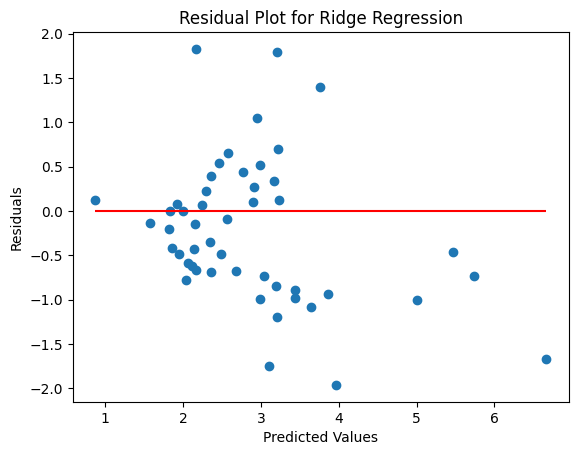

Ridge Regression - MSE: 0.70, R2 Score: 0.44


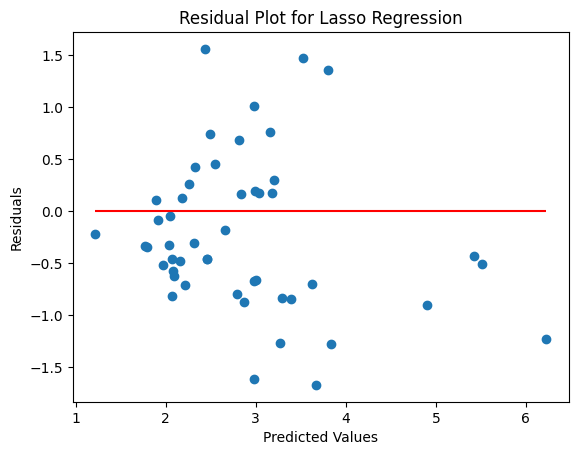

Lasso Regression - MSE: 0.59, R2 Score: 0.53


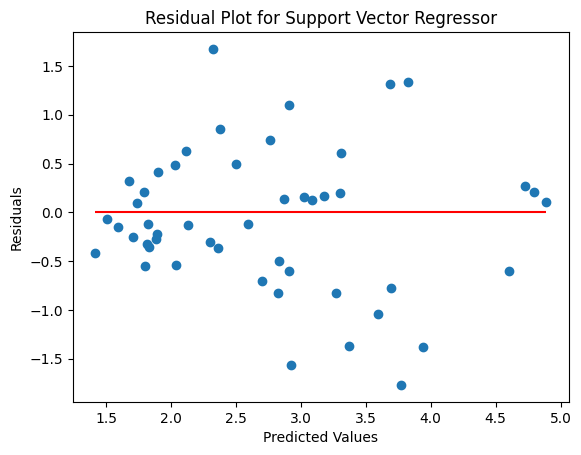

Support Vector Regressor - MSE: 0.53, R2 Score: 0.58


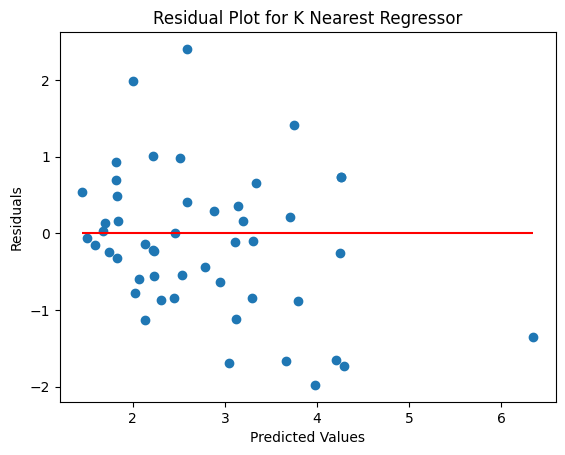

K Nearest Regressor - MSE: 0.87, R2 Score: 0.30


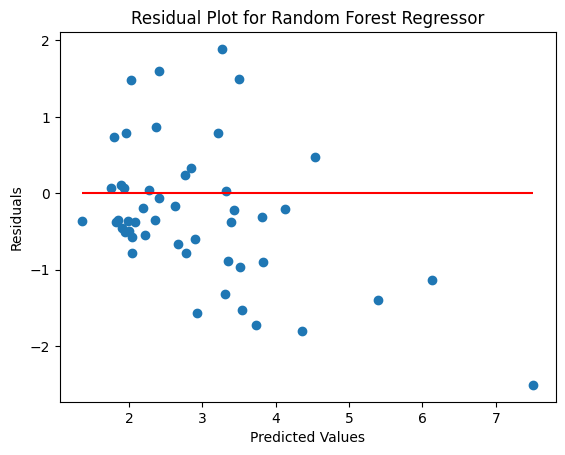

Random Forest Regressor - MSE: 0.88, R2 Score: 0.30


In [132]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    residuals = y_test - predictions  # Corrected to use y_test
    plt.scatter(predictions, residuals)
    plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
    plt.title(f'Residual Plot for {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Best performance is shown by Lasso with a MSE of 0.61 and a R2 score of 0.51 - This was with scaling

Best performance on unscalled data seems to be by SVR with MSE of 0.53 and R2 Score of 0.57 - This is when (drop_first = True) during get_dummies

*Best performance on unscaled data seems to be by SVR with MSE of 0.53 and R2 Score of 0.58*

In [120]:
import statsmodels.api as sm
X_const = sm.add_constant(X)  # Add constant for intercept
rainbow_stat, rainbow_p_val = sm.stats.diagnostic.linear_rainbow(sm.OLS(y, X_const).fit())
print("Rainbow Test p-value:", rainbow_p_val)

Rainbow Test p-value: 0.1291192152551375


This means that there is not enough evidence to show that a linear relationship exists 

Suggestions for the business for more tips:

1. Try to get more customers on weekdays by offering special discounts.
2. Try to give more personalized service to customers. This would significantly increase tips.
3. Showing Female tippers some preferrential treament may help in increase the tips given by females.
4. Try giving discounts during lunch hours. Also, make sure the service is fast. This will surely make people tip more.
5. Size of group is directly proportional to the total_bill and also to the tip. Social pressure may make the memebers tip more. Give preferrential treatments to large groups. Keep special offers.
6. Smokers can be good tippers. Giving personal space to them and access to customized smoking experiences will surely earn you a regular customer and a generous tipper.
